In [ ]:
# 참고: https://www.tensorflow.org/guide/saved_model?hl=ko

In [36]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [37]:
HOME = '/content/drive/MyDrive/test_saved_model'
%cd {HOME}

/content/drive/MyDrive/test_saved_model


In [49]:
import numpy as np
import tensorflow as tf
from matplotlib import pyplot as plt

from PIL import Image

In [50]:
mobilenet_save_path = ''

loaded = tf.saved_model.load(mobilenet_save_path)
infer = loaded.signatures["serving_default"]

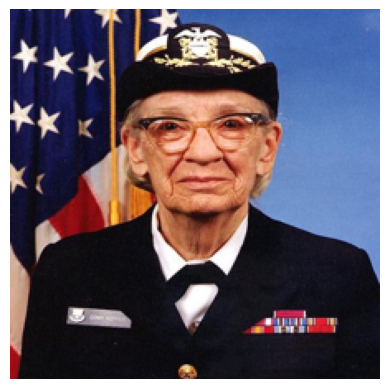

In [52]:
file = 'test_image.jpg'

img = Image.open(file).resize((224, 224))
x = np.array(img)
x = tf.keras.applications.mobilenet.preprocess_input(x[tf.newaxis, ...])


In [53]:
labels_path = tf.keras.utils.get_file(
    'ImageNetLabels.txt',
    'https://storage.googleapis.com/download.tensorflow.org/data/ImageNetLabels.txt')
imagenet_labels = np.array(open(labels_path).read().splitlines())

In [56]:
output = infer(tf.constant(x))

labeling = infer(tf.constant(x))['output_0']

decoded = imagenet_labels[np.argsort(labeling)[0,::-1][:5]+1]

print(decoded)
# Expected Result:  ['military uniform' 'bow tie' 'bearskin' 'suit' 'pickelhaube']


['military uniform' 'bow tie' 'bearskin' 'suit' 'pickelhaube']


In [58]:
import json

with open('result.json', 'w') as json_file:
    json.dump(list(decoded), json_file)